# Introduction
Zaki Syaiful Hunafa FTDS-RMT-018

Objective: 

# 1 - Import Libraries

In [84]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from keras import layers

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

from feature_engine.outliers import Winsorizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras import Model
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

import warnings 
warnings.filterwarnings('ignore')

import pickle

import time
start_time = time.time()

In [85]:
# Data loading

df = pd.read_csv('churn.csv')
pd.set_option('display.max_columns', None)

In [86]:
# Show first 10 rows in dataset

df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [87]:
# Show last 10 rows of data

df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


# 2 - EDA

In [88]:
# Check duplicated data
df[df.duplicated()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
3321,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,12:47:12,16,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
9505,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,18:16:03,8,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
11478,9ba8bf4d1e50100c,47,F,Town,Gold Membership,2016-07-10,No,Credit/Debit Card Offers,Both,Fiber_Optic,02:13:06,-999,497.320000,15082.13,11.0,730.340000,No,Yes,Yes,Unsolved,No reason specified,0
12589,8f39faa74b6607e7,26,F,City,Premium Membership,2015-10-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,17:33:22,-999,116.140000,26377.39,0.0,710.310000,Yes,No,Yes,Solved,No reason specified,0
14840,859745861c61ebef,35,M,City,Silver Membership,2016-03-27,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,03:44:26,23,1064.763315,42483.66,28.0,702.110000,No,Yes,Yes,Solved in Follow-up,Too many ads,1
16165,9c8c2db425854d5e,54,M,NaN,Platinum Membership,2015-09-28,Yes,Without Offers,Smartphone,Fiber_Optic,05:39:46,12,1267.660000,38244.30,18.0,741.640000,No,Yes,No,Not Applicable,No reason specified,0
22341,9186d6f284e4ac5b,59,M,Town,Basic Membership,2015-01-07,NaN,Credit/Debit Card Offers,Desktop,Mobile_Data,14:43:07,16,266.190000,48632.63,19.0,654.590000,Yes,Yes,Yes,Unsolved,Poor Website,1
24693,930b39d136f072e3,56,M,Town,Premium Membership,2015-09-18,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,17:05:33,18,150.620000,23164.44,16.0,775.190000,Yes,No,Yes,Solved,Poor Product Quality,0
26214,a594feaffc78b36b,58,M,City,Basic Membership,2017-04-01,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,05:23:02,19,0.000000,7614.88,29.0,202.317926,Yes,No,No,Not Applicable,Poor Customer Service,1
26687,9d20f093164c98a3,35,M,NaN,Platinum Membership,2016-06-08,No,Gift Vouchers/Coupons,Both,Fiber_Optic,17:58:45,4,228.570000,77844.85,14.0,714.280000,No,Yes,No,Not Applicable,User Friendly Website,0


In [89]:
# Check null values
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [90]:
df.shape

(37010, 22)

In [91]:
# Data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761
churn_risk_score,37010.0,0.540881,0.498333,0.00,0.0000,1.000,1.0000,1.000000


# 3 - Preprocessing

## 3.1 Duplicated Data

I will delete all duplicated data and keep the last data

In [92]:
df = df.drop_duplicates(keep='last')

# Check if there is still duplicated data

df[df.duplicated()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score


All duplicated data is well handled

In [93]:
df.shape

(36992, 22)

# 4 - Feature Engineering

## 4.1 - Splitting X and y

In [94]:
# Splitting data 
X = df.drop('churn_risk_score', axis=1)
y = df['churn_risk_score']

In [95]:
# Split Train-set, Validation-set, and Test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=29)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (23674, 21)
Val Size :  (5919, 21)
Test Size :  (7399, 21)


## 4.2 - Handling Missing values

In [96]:
# Check missing values in X_train
missing_xtrain = pd.DataFrame(X_train.isnull().sum(), columns=['No. of missing values'])
missing_xtrain['% missing_values'] = (missing_xtrain/len(X_train)).round(2)*100
missing_xtrain
     

,No. of missing values,% missing_values
user_id,0,0.0
age,0,0.0
gender,43,0.0
region_category,3513,15.0
membership_category,0,0.0
joining_date,0,0.0
joined_through_referral,3426,14.0
preferred_offer_types,186,1.0
medium_of_operation,3437,15.0
internet_option,0,0.0


In [97]:
# Check missing values in X_val
missing_xval = pd.DataFrame(X_val.isnull().sum(), columns=['No. of missing values'])
missing_xval['% missing_values'] = (missing_xval/len(X_val)).round(2)*100
missing_xval

,No. of missing values,% missing_values
user_id,0,0.0
age,0,0.0
gender,6,0.0
region_category,873,15.0
membership_category,0,0.0
joining_date,0,0.0
joined_through_referral,886,15.0
preferred_offer_types,43,1.0
medium_of_operation,852,14.0
internet_option,0,0.0


In [98]:
# Check missing values in X_test
missing_xtest = pd.DataFrame(X_test.isnull().sum(), columns=['No. of missing values'])
missing_xtest['% missing_values'] = (missing_xtest/len(X_test)).round(2)*100
missing_xtest

,No. of missing values,% missing_values
user_id,0,0.0
age,0,0.0
gender,10,0.0
region_category,1042,14.0
membership_category,0,0.0
joining_date,0,0.0
joined_through_referral,1126,15.0
preferred_offer_types,59,1.0
medium_of_operation,1104,15.0
internet_option,0,0.0


There are two common ways to handle missing values
1. Imputation of mean/median of the column
2. Drop NaN rows

Since the NaN values are in the categorical column which it's is unlikely to get the mean/median of the column, hence we will drop the NaN rows.

In [99]:
for i in [X_train, X_val, X_test]:
  i.dropna(inplace=True)

In [100]:
# Drop rows in y-set
indices = X_train.index
y_train = y_train.loc[indices]

indices = X_val.index
y_val = y_val.loc[indices]

indices = X_test.index
y_test = y_test.loc[indices]

## 4.3 - Handling Outliers

In [101]:
# Define Numerical and Categorical Columns
num_cols = X._get_numeric_data().columns.tolist()
cat_cols = [i for i in X if i not in num_cols]

In [102]:
num_cols

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

### 4.3.a - Handling Outliers: X_train

age


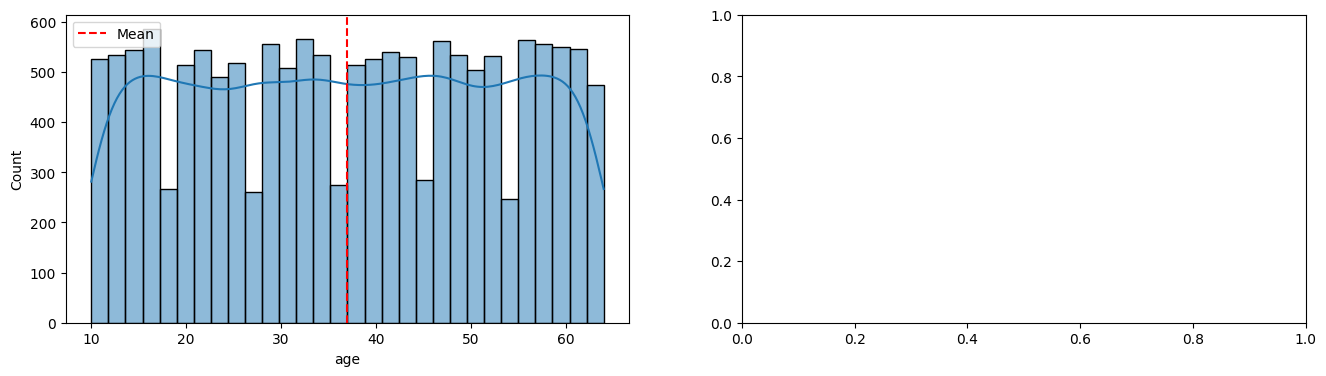

days_since_last_login


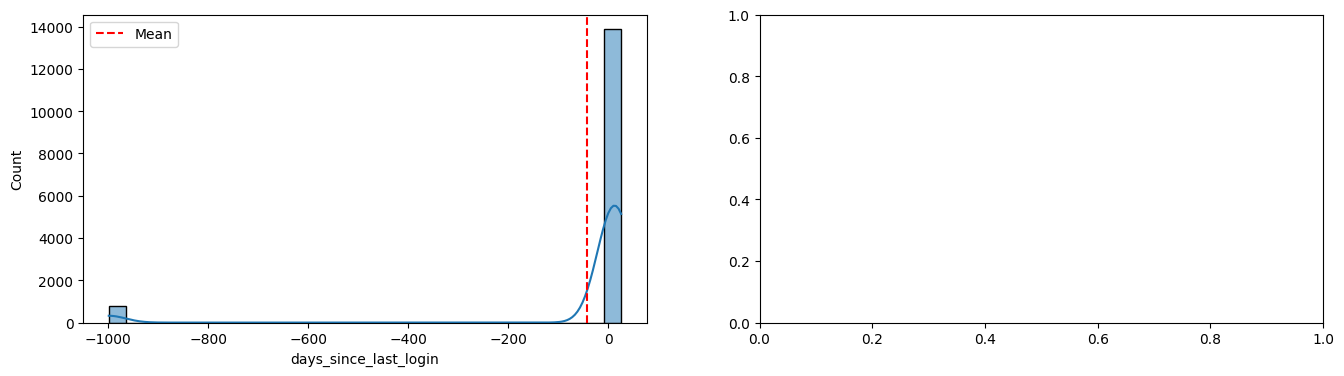

avg_time_spent


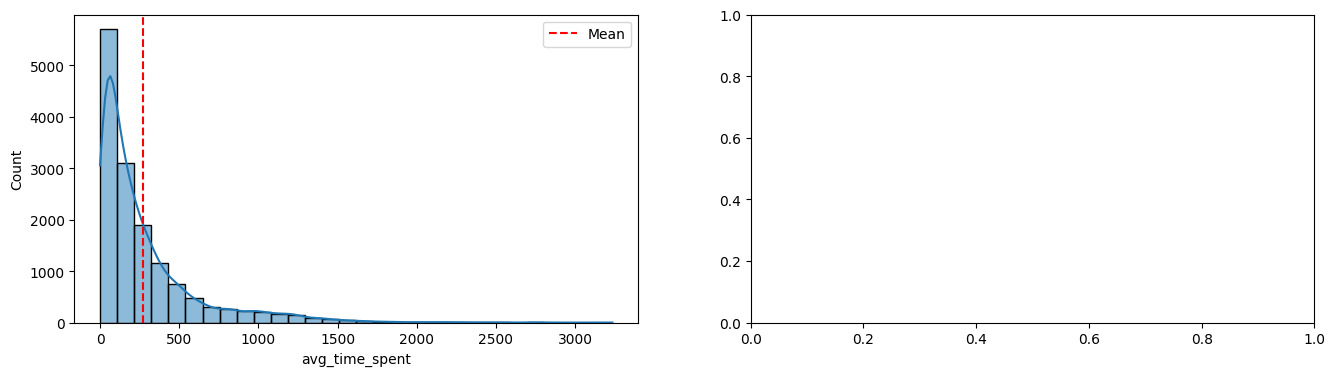

avg_transaction_value


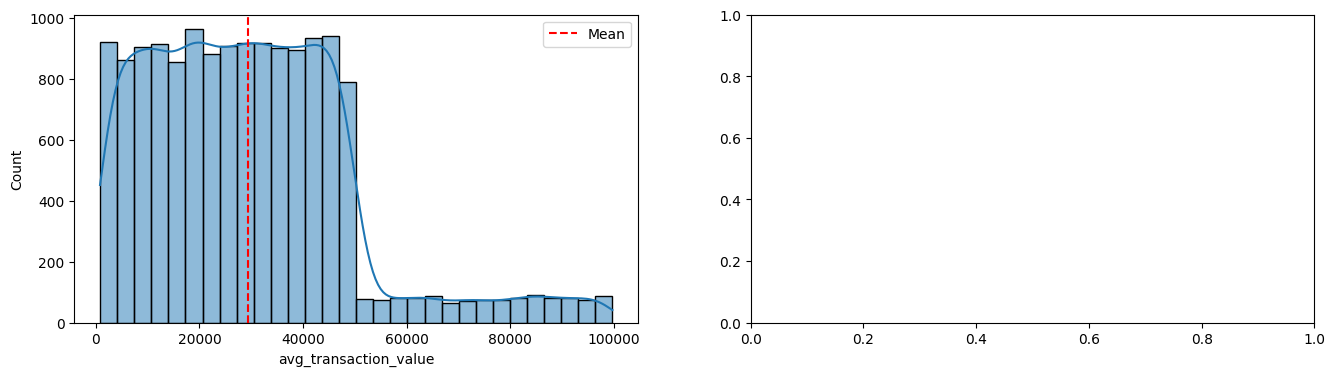

avg_frequency_login_days


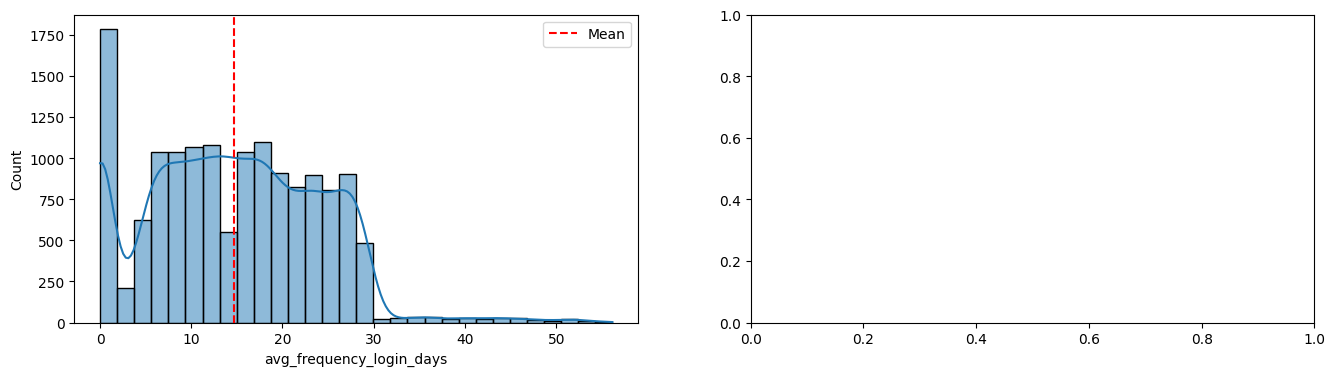

points_in_wallet


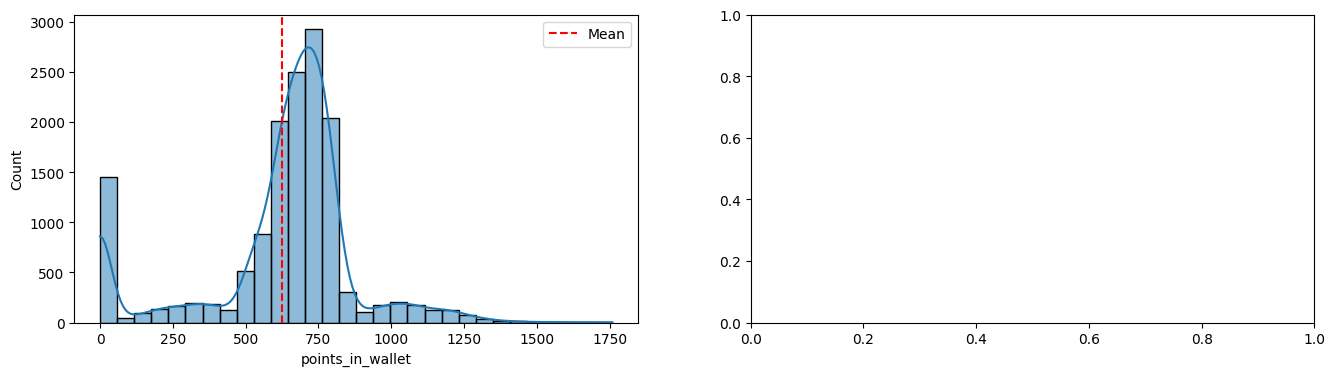

In [103]:
for i in num_cols:
  print(i)
  fig, axs = plt.subplots(1,2, figsize=(16,4))
  sns.histplot(X_train[i], bins=30, kde=True, ax=axs[0])
  # sns.boxplot(X_train[i], ax=axs[1])

  axs[0].axvline(X_train[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()
  plt.show()


### 4.3.b - Handling Outliers: X_val

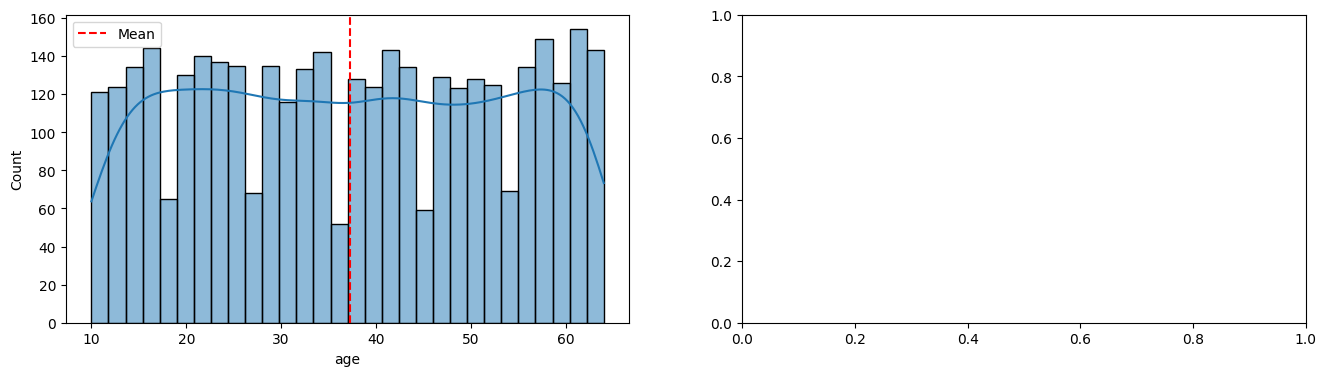

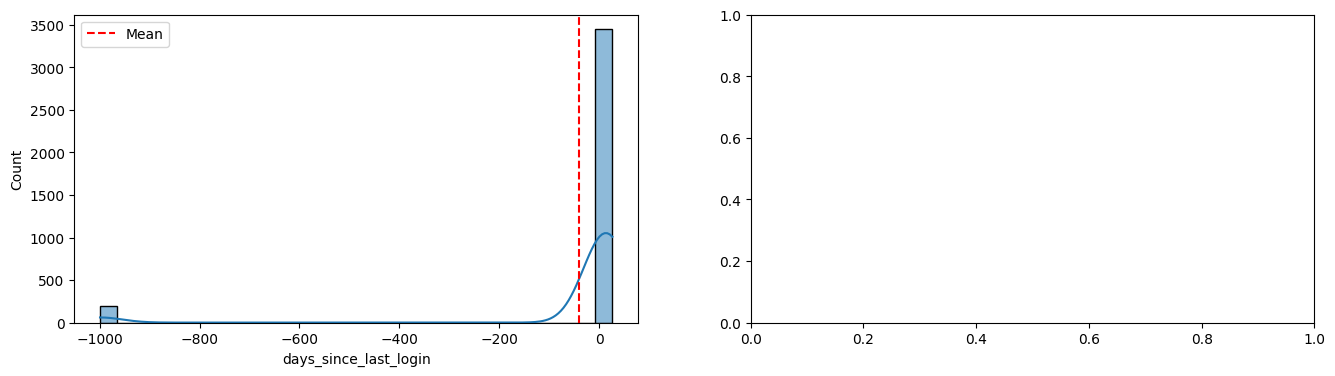

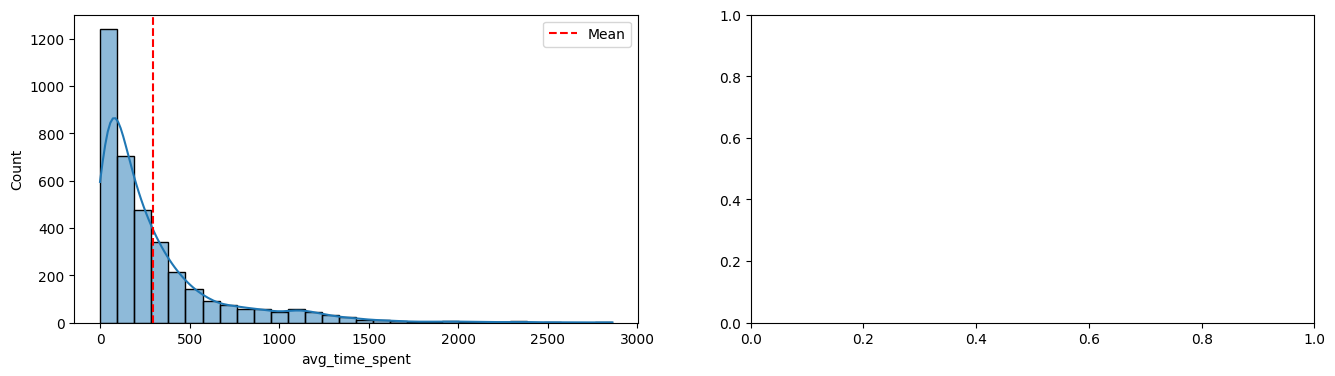

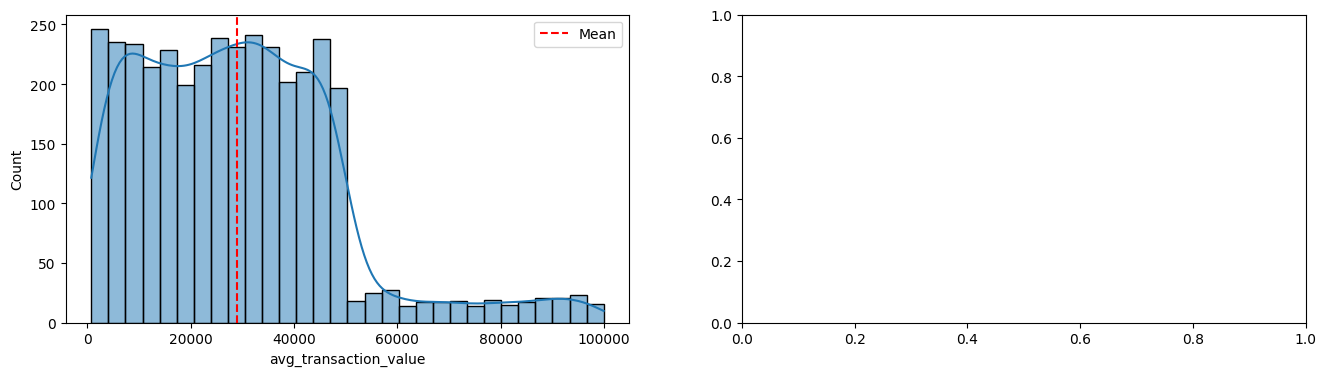

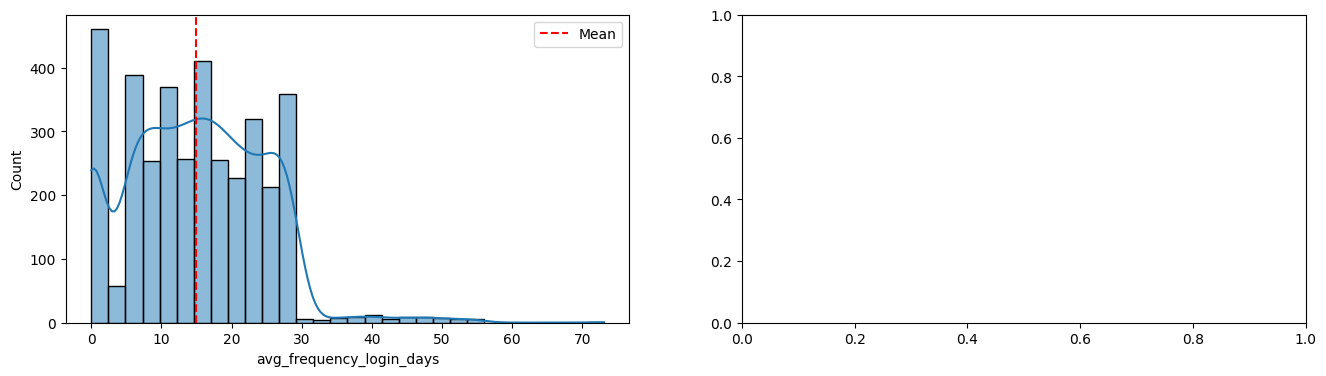

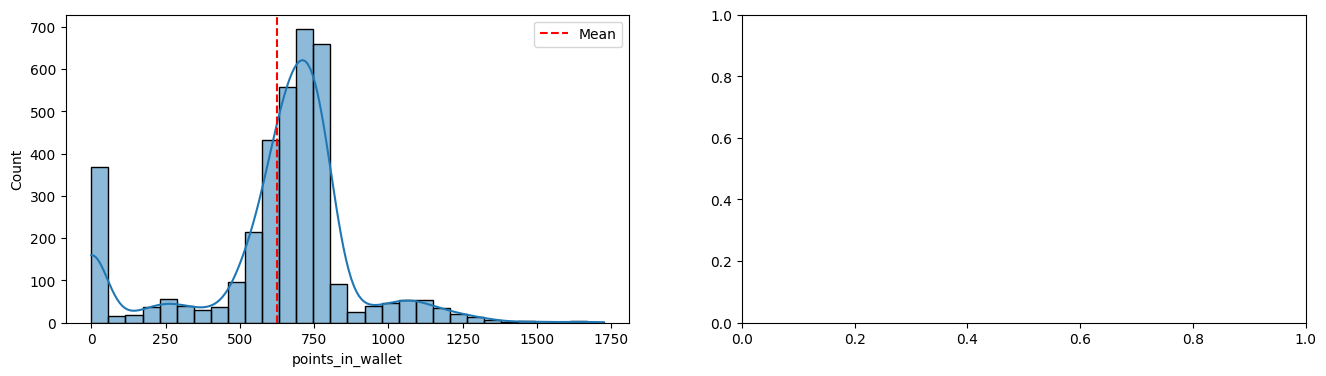

In [104]:
for i in num_cols:
  fig, axs = plt.subplots(1,2, figsize=(16,4))
  sns.histplot(X_val[i], bins=30, kde=True, ax=axs[0])
  # sns.boxplot(X_val[i], ax=axs[1])

  axs[0].axvline(X_val[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()
  plt.show()

### 4.3.c - Handling Outliers: X_test

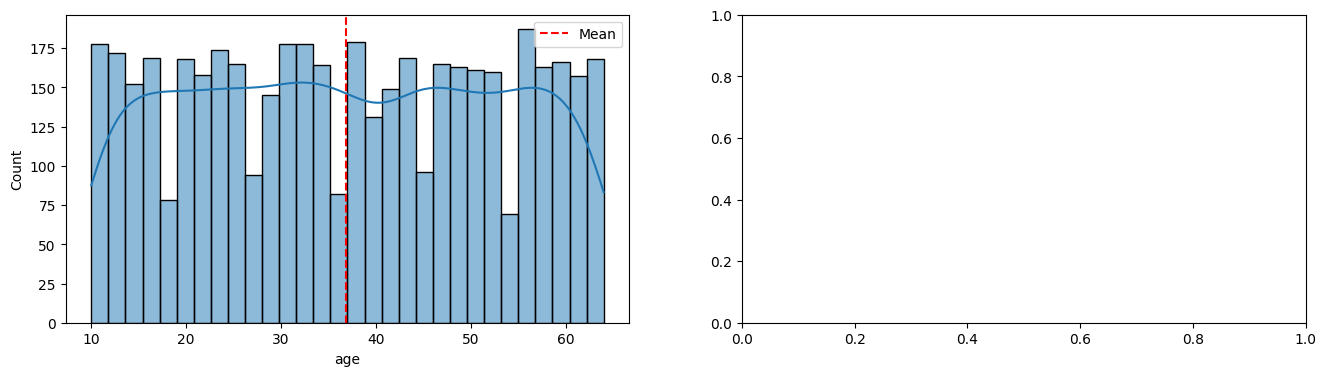

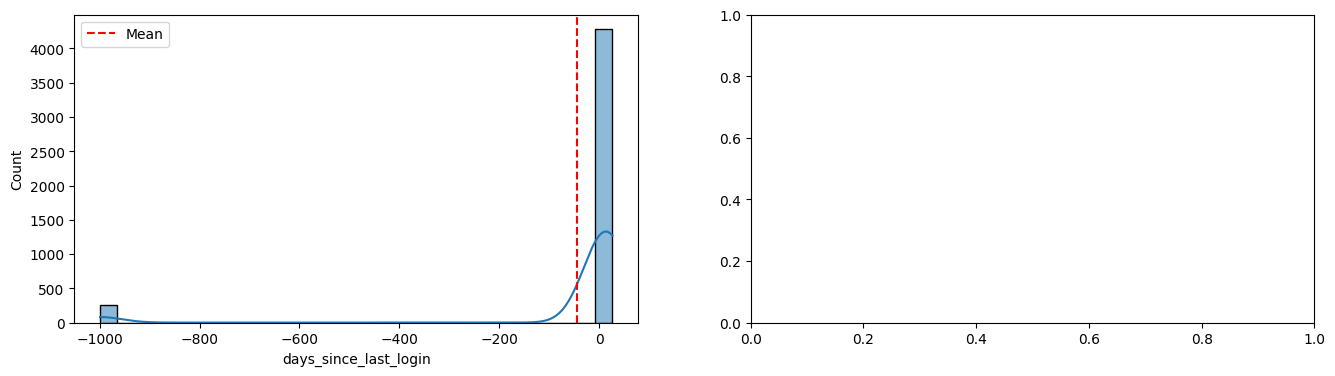

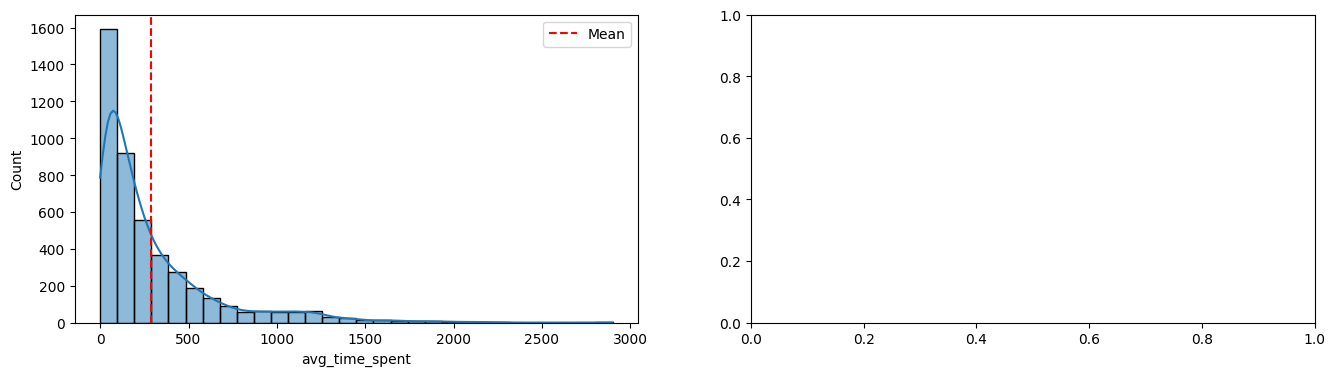

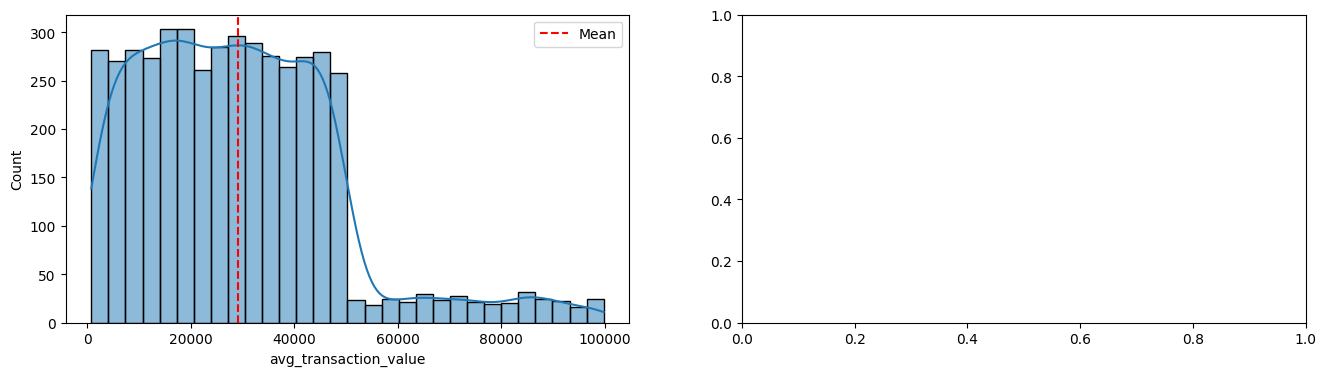

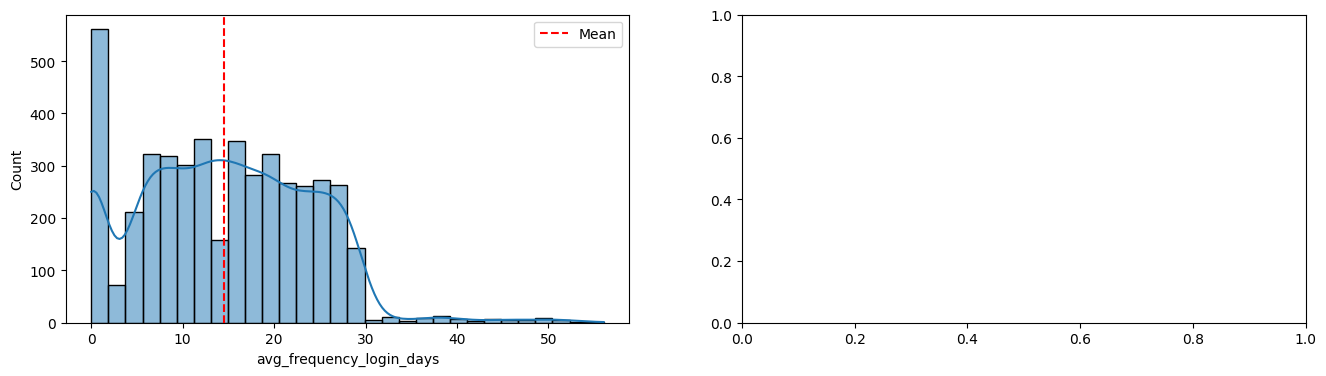

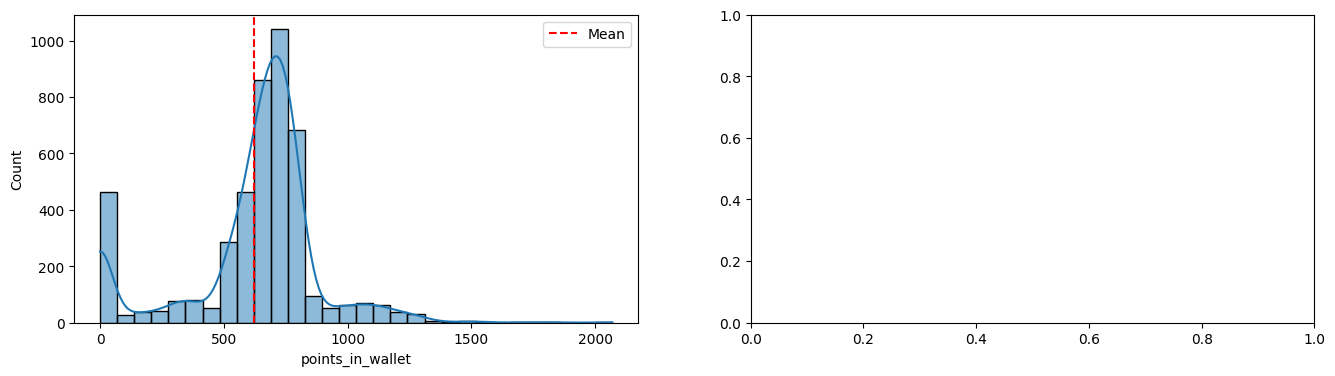

In [105]:
for i in num_cols:
  fig, axs = plt.subplots(1,2, figsize=(16,4))
  sns.histplot(X_test[i], bins=30, kde=True, ax=axs[0])
  # sns.boxplot(X_test[i], ax=axs[1])

  axs[0].axvline(X_test[i].mean(), color='red', linestyle='dashed', label = 'Mean')
  axs[0].legend()
  plt.show()

In [106]:
# Define columns
features = ['days_since_last_login', 'avg_time_spent', 'avg_frequency_login_days', 'points_in_wallet']

## 4.4 - Feature Selection

<Axes: >

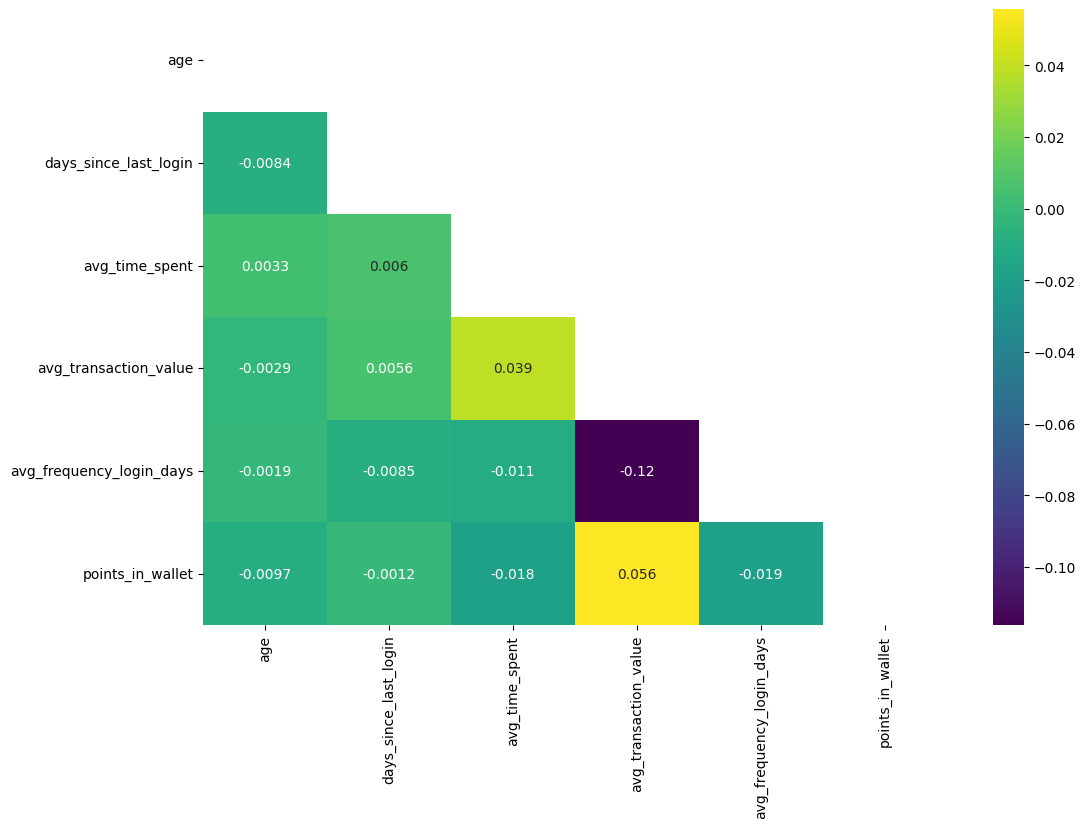

In [107]:
plt.subplots(figsize=(12,8))
mask = np.triu(np.ones_like(X_train.corr()))
sns.heatmap(X_train.corr(), annot = True,cmap = 'viridis',mask = mask)

In [108]:
for i in [X_train, X_val, X_test]:
  i.drop(['user_id', 'last_visit_time', 'avg_transaction_value'], axis=1, inplace=True)

In [109]:
# Redefine numerical and categorical columns
num_cols = X_train._get_numeric_data().columns.tolist()
cat_cols = [i for i in X_train if i not in num_cols]

In [110]:
num_cols

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_frequency_login_days',
 'points_in_wallet']

## 4.5 Pipeline

In [111]:
# Create a pipeline
outlier_pipeline = make_pipeline(Winsorizer(capping_method= 'iqr', tail='both', fold=1.5))

num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder(sparse=False,handle_unknown = 'ignore'))

pipeline = ColumnTransformer([
    ('pipe_outlier', outlier_pipeline, features),
    ('pipe_num', num_pipeline, num_cols),
    ('pipe_cat', cat_pipeline, cat_cols)
])


In [112]:
# Fit and Transform

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)

## 4.6 Pipeline TF

In [113]:

# input data pipeline
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(5).batch(150)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).shuffle(5).batch(150)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).shuffle(5).batch(150)

# 5 - Sequential API

## 5.1 - Model Definition

In [114]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [115]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(32, activation='relu', input_shape=(1147,)))
model_sequential.add(Dense(16, activation='relu'))
model_sequential.add(Dense(1, activation='sigmoid'))

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['Recall'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                36736     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 37,281
Trainable params: 37,281
Non-trainable params: 0
_________________________________________________________________


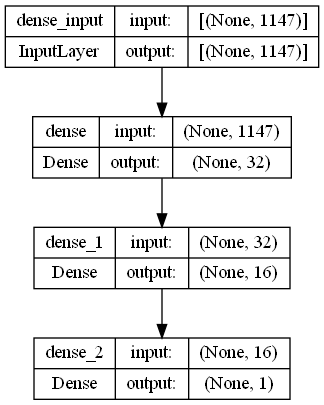

In [116]:
# Plot Layer
tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## 5.2 Model training

In [117]:
# Train the model
history_seq = model_sequential.fit(X_train,
                                   y_train,
                                   epochs=25,
                                   validation_data=(X_val, y_val),
                                   batch_size=16)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/25
917/917 [==============================] - 3s 3ms/step - loss: 0.5846 - recall: 0.7534 - val_loss: 0.4648 - val_recall: 0.6547
Epoch 2/25
917/917 [==============================] - 4s 4ms/step - loss: 0.3725 - recall: 0.8524 - val_loss: 0.3129 - val_recall: 0.7934
Epoch 3/25
917/917 [==============================] - 2s 2ms/step - loss: 0.3060 - recall: 0.8647 - val_loss: 0.3473 - val_recall: 0.7509
Epoch 4/25
917/917 [==============================] - 2s 2ms/step - loss: 0.2971 - recall: 0.8693 - val_loss: 0.2650 - val_recall: 0.8634
Epoch 5/25
917/917 [==============================] - 3s 3ms/step - loss: 0.2878 - recall: 0.8750 - val_loss: 0.2631 - val_recall: 0.8302
Epoch 6/25
917/917 [==============================] - 3s 4ms/step - loss: 0.2729 - recall: 0.8837 - val_loss: 0.3590 - val_recall: 0.7504
Epoch 7/25
917/917 [==============================] - 2s 2ms/step - loss: 0.2726 - recall: 0.8832 - val_loss: 0.3692 - val_recall: 0.9944
Epoch 8/25
917/917 [==============

## 5.3 Model Evaluation

In [118]:
# Create dataframe
history_seq_df = pd.DataFrame(history_seq.history)

<Axes: >

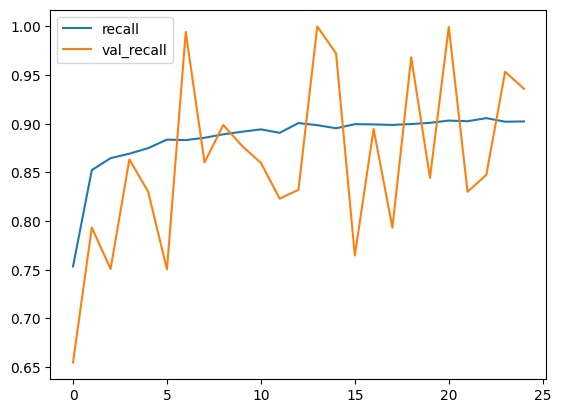

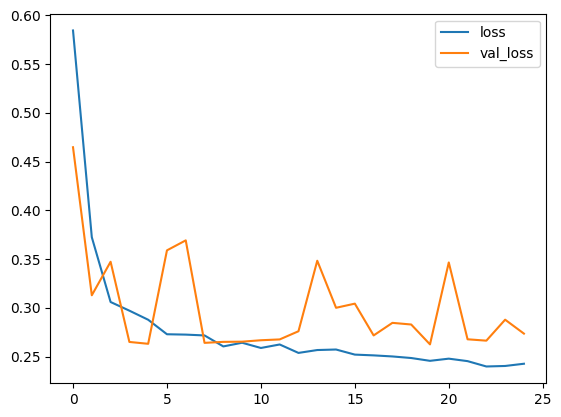

In [119]:
# plot_training_result
history_seq_df[['recall', 'val_recall']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [120]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

142/142 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2126
           1       0.82      0.94      0.88      2412

    accuracy                           0.86      4538
   macro avg       0.87      0.85      0.86      4538
weighted avg       0.87      0.86      0.86      4538



# 6 - Functional API

## 6.1 Model Definition

In [121]:
# Clear Session
seed =20
tf.keras.backend.clear_session
np.random.seed(seed)
tf.random.set_seed(seed)

In [122]:
# Create session
input_layer = Input(shape=(1147,))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(18, activation='relu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

In [123]:
# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='Recall')

model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1147)]       0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 32)           36736       ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 18)           594         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 1165)         0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

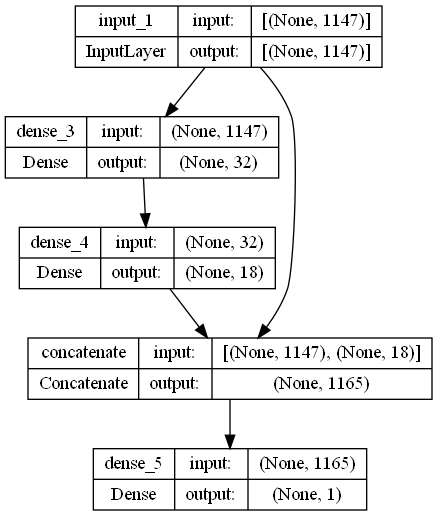

In [124]:
# Plot layers
tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 6.2 Model Training

In [125]:
# Train the model
history_func = model_functional.fit(X_train,
                                    y_train,
                                    epochs=25,
                                    validation_data=(X_val, y_val),
                                    batch_size=20)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/25
734/734 [==============================] - 2s 2ms/step - loss: 0.8211 - recall: 0.7507 - val_loss: 0.4188 - val_recall: 0.9054
Epoch 2/25
734/734 [==============================] - 2s 2ms/step - loss: 0.3845 - recall: 0.8623 - val_loss: 0.3320 - val_recall: 0.8041
Epoch 3/25
734/734 [==============================] - 1s 2ms/step - loss: 0.3092 - recall: 0.8693 - val_loss: 0.2929 - val_recall: 0.7944
Epoch 4/25
734/734 [==============================] - 1s 2ms/step - loss: 0.3002 - recall: 0.8671 - val_loss: 0.2693 - val_recall: 0.8552
Epoch 5/25
734/734 [==============================] - 1s 2ms/step - loss: 0.2884 - recall: 0.8705 - val_loss: 0.3270 - val_recall: 0.7621
Epoch 6/25
734/734 [==============================] - 2s 2ms/step - loss: 0.2772 - recall: 0.8742 - val_loss: 0.2967 - val_recall: 0.7611
Epoch 7/25
734/734 [==============================] - 1s 2ms/step - loss: 0.2747 - recall: 0.8822 - val_loss: 0.4046 - val_recall: 1.0000
Epoch 8/25
734/734 [==============

## 6.3 Model Evaluation

In [126]:
# Create Dataframe
history_func_df = pd.DataFrame(history_func.history)

<Axes: >

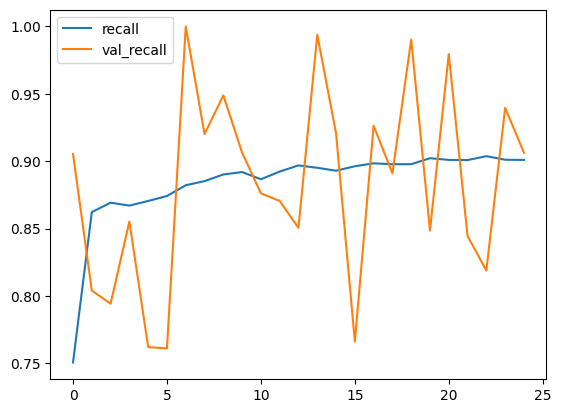

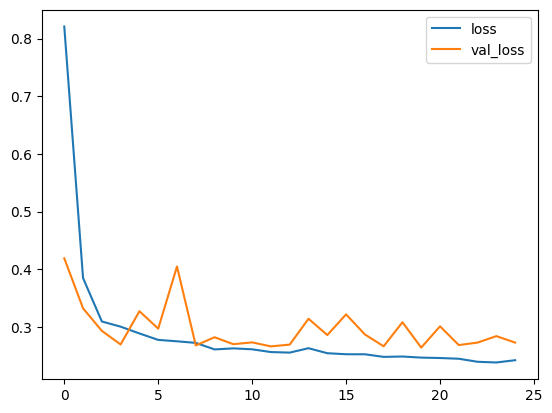

In [127]:
# Plot Training Model
history_func_df[['recall', 'val_recall']].plot()
history_func_df[['loss', 'val_loss']].plot()

In [128]:
# Evaluate Test Set
y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5,1,0)


print(classification_report(y_test, y_pred_func))

142/142 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      2126
           1       0.83      0.92      0.87      2412

    accuracy                           0.86      4538
   macro avg       0.86      0.85      0.85      4538
weighted avg       0.86      0.86      0.86      4538



# 7 - Sequential Improvement

## 7.1 - Improvement Definition

In [129]:
# clear session
seed = 39
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [150]:
sequential_improvement = Sequential()
sequential_improvement.add(Dense(64, activation='relu', input_shape=(1147,)))
sequential_improvement.add(tf.keras.layers.BatchNormalization())

sequential_improvement.add(Dense(32, activation='relu'))
sequential_improvement.add(tf.keras.layers.BatchNormalization())

sequential_improvement.add(Dense(16, activation='relu'))
sequential_improvement.add(tf.keras.layers.BatchNormalization())

sequential_improvement.add(Dense(8, activation='relu'))
sequential_improvement.add(tf.keras.layers.BatchNormalization())

sequential_improvement.add(Dense(1, activation='sigmoid'))

# Compile
sequential_improvement.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['Recall'])

sequential_improvement.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                73472     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_2 (Batc  (None, 16)              

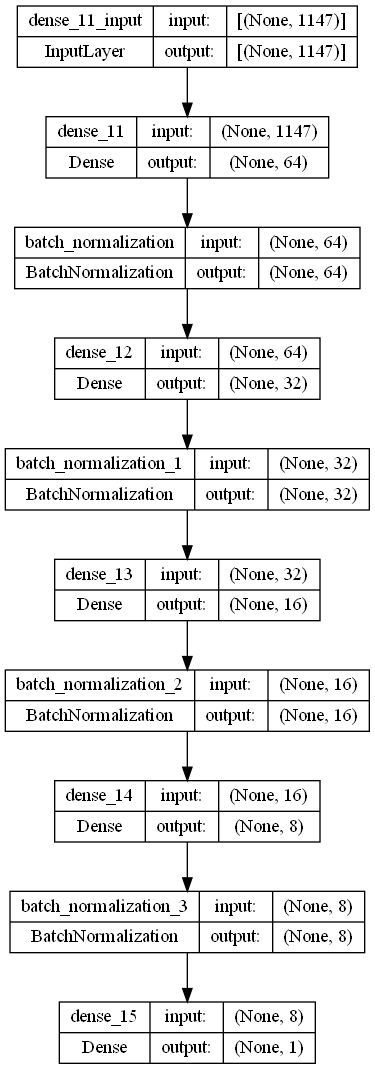

In [151]:
# Plot Layer
tf.keras.utils.plot_model(sequential_improvement, show_shapes=True)

## 7.2 - Model Training

In [152]:
# Train the model
history_sequential_improvement = sequential_improvement.fit(train_pipe, epochs=100, validation_data=val_pipe, callbacks=EarlyStopping(monitor='val_loss', patience=20) )

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
98/98 [==============================] - 2s 8ms/step - loss: 0.4973 - recall: 0.7087 - val_loss: 0.7196 - val_recall: 0.3141
Epoch 2/100
98/98 [==============================] - 1s 6ms/step - loss: 0.3501 - recall: 0.8274 - val_loss: 0.6557 - val_recall: 0.8977
Epoch 3/100
98/98 [==============================] - 0s 5ms/step - loss: 0.2593 - recall: 0.9024 - val_loss: 0.7695 - val_recall: 0.9698
Epoch 4/100
98/98 [==============================] - 1s 5ms/step - loss: 0.2188 - recall: 0.9348 - val_loss: 0.9725 - val_recall: 0.9980
Epoch 5/100
98/98 [==============================] - 1s 6ms/step - loss: 0.2069 - recall: 0.9442 - val_loss: 0.4701 - val_recall: 0.7049
Epoch 6/100
98/98 [==============================] - 1s 6ms/step - loss: 0.1926 - recall: 0.9450 - val_loss: 1.4290 - val_recall: 1.0000
Epoch 7/100
98/98 [==============================] - 1s 5ms/step - loss: 0.1956 - recall: 0.9489 - val_loss: 2.4228 - val_recall: 0.7928
Epoch 8/100
98/98 [======================

## 7.3 Model Evaluation

In [153]:
# Create dataframe
history_improvement_df = pd.DataFrame(history_sequential_improvement.history)

<Axes: >

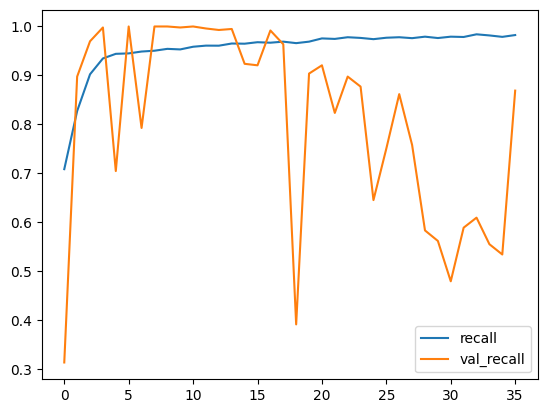

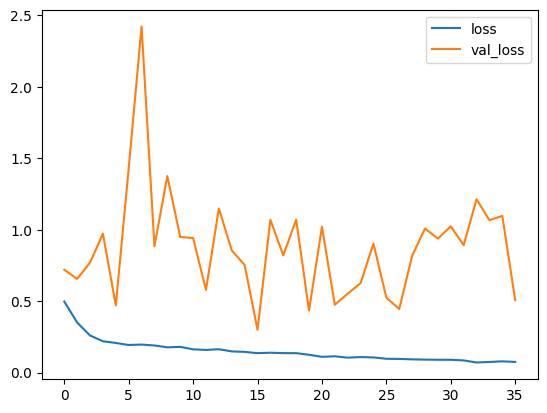

In [154]:
# plot_training_result
history_improvement_df[['recall', 'val_recall']].plot()
history_improvement_df[['loss', 'val_loss']].plot()

In [155]:
y_pred_func_tuned = sequential_improvement.predict(X_test)
y_pred_func_tuned = np.where(y_pred_func_tuned >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_tuned))

142/142 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2126
           1       0.90      0.88      0.89      2412

    accuracy                           0.89      4538
   macro avg       0.89      0.89      0.89      4538
weighted avg       0.89      0.89      0.89      4538



# 8 - Functional Improvement

## 8.1 - Improvement Definition

In [136]:
# clear session
seed = 39
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [137]:
input_layer_improvement = Input(shape=(1147,))
impr_hidden_layer_1 = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1))(input_layer_improvement)
impr_hidden_layer_1 = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1))(impr_hidden_layer_1)
impr_hidden_out_1 = layers.Dropout(0.5)(impr_hidden_layer_1)

impr_hidden_layer_2 = Dense(32, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1))(input_layer_improvement)
impr_hidden_layer_2 = Dense(32, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1))(impr_hidden_layer_2)
impr_hidden_out_2 = layers.Dropout(0.5)(impr_hidden_layer_1)

impr_hidden_layer_3 = Dense(16, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1))(input_layer_improvement)
impr_hidden_layer_3= Dense(16, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1))(impr_hidden_layer_3)
impr_hidden_out_3 = layers.Dropout(0.5)(impr_hidden_layer_1)

impr_hidden_layer_4 = Dense(8, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1))(input_layer_improvement)
impr_hidden_layer_4 = Dense(8, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1))(impr_hidden_layer_4)
impr_hidden_out_4 = layers.Dropout(0.5)(impr_hidden_layer_1)

concat_layer_impr = concatenate([impr_hidden_out_1, impr_hidden_out_2, impr_hidden_out_3, impr_hidden_out_4])
output_layer_impr = Dense(1, activation='sigmoid')(concat_layer_impr)

model_functional_impr = Model(inputs=input_layer_improvement, outputs=output_layer_impr)

In [138]:
#compile
model_functional_impr.compile(loss='binary_crossentropy',
                        optimizer='adam',
                        metrics=['Recall']    
                        ) 


model_functional_impr.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1147)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           73472       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           4160        ['dense[0][0]']                  
                                                                                                  
 dropout (Dropout)              (None, 64)           0           ['dense_1[0][0]']                
                                                                                              

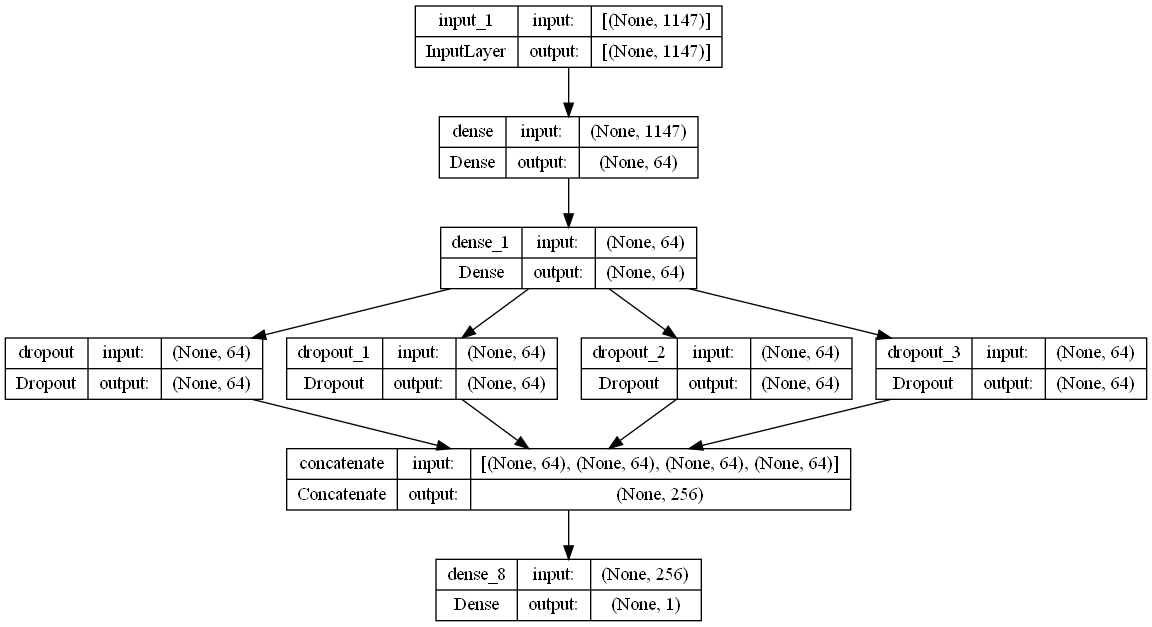

In [139]:
tf.keras.utils.plot_model(model_functional_impr,show_shapes=True)

## 8.2 Improvement Training

In [140]:
# Train model menggunakan early stopping
history_seq_improvement = model_functional_impr.fit(train_pipe, epochs=100, validation_data=val_pipe, callbacks=EarlyStopping(monitor='val_loss', patience=20) )

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
98/98 [==============================] - 1s 7ms/step - loss: 15.7741 - recall: 0.5199 - val_loss: 7.1669 - val_recall: 0.8793
Epoch 2/100
98/98 [==============================] - 1s 6ms/step - loss: 5.4349 - recall: 0.6116 - val_loss: 4.0338 - val_recall: 0.6609
Epoch 3/100
98/98 [==============================] - 1s 6ms/step - loss: 3.2315 - recall: 0.6403 - val_loss: 2.5534 - val_recall: 0.6757
Epoch 4/100
98/98 [==============================] - 1s 5ms/step - loss: 2.1513 - recall: 0.6567 - val_loss: 1.8003 - val_recall: 0.7913
Epoch 5/100
98/98 [==============================] - 1s 6ms/step - loss: 1.5864 - recall: 0.6632 - val_loss: 1.3886 - val_recall: 0.7852
Epoch 6/100
98/98 [==============================] - 1s 5ms/step - loss: 1.2678 - recall: 0.6658 - val_loss: 1.1512 - val_recall: 0.5734
Epoch 7/100
98/98 [==============================] - 0s 5ms/step - loss: 1.0786 - recall: 0.6723 - val_loss: 1.0022 - val_recall: 0.6061
Epoch 8/100
98/98 [=====================

## 8.3 - Improvement Evaluation

In [141]:
# Create dataframe
history_improvement_df = pd.DataFrame(history_seq_improvement.history)

<Axes: >

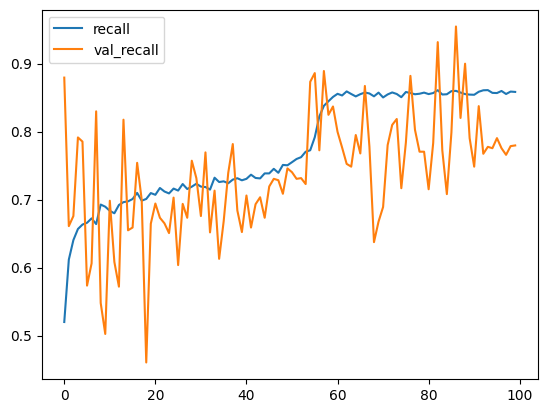

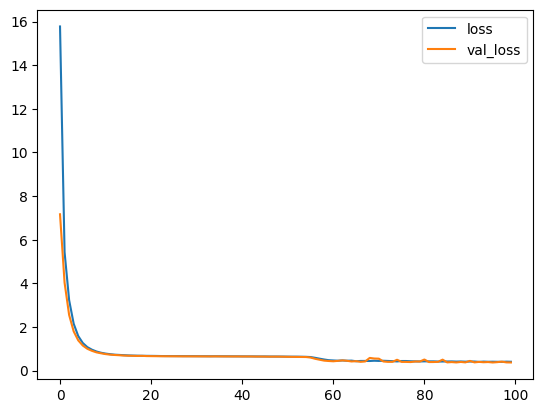

In [142]:
# plot_training_result
history_improvement_df[['recall', 'val_recall']].plot()
history_improvement_df[['loss', 'val_loss']].plot()

In [143]:
# Model Evaluation of test-set

y_pred_seq = model_functional_impr.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

142/142 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2126
           1       0.92      0.79      0.85      2412

    accuracy                           0.85      4538
   macro avg       0.86      0.86      0.85      4538
weighted avg       0.86      0.85      0.85      4538



# 8 - Model Saving

In [144]:
# # Save Pipeline
# with open('final_pipeline.pkl', 'wb') as file_1:
#     pickle.dump(pipeline, file_1)

In [145]:
# # Summary of model sequential
# model_sequential.summary()

In [146]:
# # Freeze Model
# model_sequential.trainable = False
# model_sequential.summary()

In [147]:
# # Save Model ANN Model
# model_sequential.save('churn_model.h5')